# Django 5일차

### Django Form

Form 사용에 대한 불편함이 존재한다.  
- \<form\> 태그 안에 사용할 데이터 맞춰서 하나하나 \<input\>넣어주고 HTML에 배치하고, 데이터 꺼내오고...

그런데 생각해보면 없으면, 안되고, 오히려 굉장히 많이 사용한다.  

&nbsp;

<b>개요</b>  

우리는 지금까지 HTML form, input tag를 통해서 사용자로부터 데이터를 받았음  

현재 우리는 Django 서버는 들어오는 요청을 모두 수용하고 있는데, 이러한 요청 중 비정상적인 혹은 악의적인 요청이 있다는 것을 생각해야 함  

이처럼 사용자가 입력한 데이터가 우리가 원하는 데이터 형식이 맞는지에 대한 <mark>유효성 검증</mark>이 반드시 필요함   

- 이러한 유효성 검증은 많은 부가적인 것들을 고려해야 하는데, 이는 개발 생산성을 늦출 뿐더러 쉽지 않은 작업임  

<i>Django Form</i>은 이 과정에서 과중한 작업과 반복 코드를 줄여줌으로써 훨씬 쉽게 유효성 검증을 진행할 수 있도록 만들어줌  

&nbsp;

<b>Form에 대한 Django의 역할</b>  

Form은 Django의 유효성 검사 도구 중 하나로 외부의 악의적 공격 및 데이터 손상에 대한 중요한 방어 수단  

Django는 Form과 관련한 유효성 검사를 <mark>단순화하고 자동화</mark>할 수 있는 기능을 제공하여, 개발자 직접 작성하는 코드보다 더 안전하고 빠르게 수행하는 코드를 작성할 수 있다  
- 개발자가 필요한 핵심 부분만 집중할 수 있도록 돕는 프레임워크의 특성  

&nbsp;

<b>Django는 Form에 관련된 작업의 세 부분을 처리</b>  

1. 렌더링을 위한 데이터 준비 및 재구성
2. 데이터에 대한 HTML forms 생성  
3. 클라이언트로부터 받은 데이터 수신 및 처리  

### The Django Form Class

<b>개요</b>  

Form Class
- Django form 관리 시스템의 핵심  

&nbsp;

<b>Form Class 선언</b>  

Form Class를 선언하는 것은 Model Class를 선언하는 것과 비슷하다.  
- 비슷한 이름의 필드 타입을 많이 가지고 있다.
- (다만 이름만 같을 뿐 같은 필드는 아님)  

Model과 마찬가지로 상속을 통해 선언  
- (forms 라이브러리의 Form 클래스를 상속받음)  

- 앱 폴더에 forms.py를 생성 후 ArticleForm Class 선언  

```
# articles/forms.py

from django import forms

class ArticlesForm(forms.Form):
    title = forms.CharField(max_length=10)
    content = forms.CharField()
```

form에는 model field와 달리 TextField가 존재하지 않음  

모델의 TextField처럼 사용하려면 어떻게 작성할 수 있을지는 곧 알아볼 예정  

<font color="red">"Form Class를 forms.py에 작성하는 것은 규약이 아니다." <br>
파일 이름이 달라도 되고 models.py나 다른 어디에도 작성가능 <br>
다만 더 나은 유지보수의 관점 그리고 관행적으로 forms.py 파일 안에 작성하는 것을 권장  </font>

```
# articles/forms.py

from django import forms

class ArticleForm(forms.Form):
    title = forms.CharField(max_length=30)
    content = forms.CharField(widget=forms.Textarea)


# articles/views.py 업데이트

from .forms import ArticleForm
...
def create(request):
    if request.method == 'POST':
        title = request.POST.get('title')
        content = request.POST.get('content')
        article = Article(title=title, content=content)
        article.save()
        return redirect('articles:detail', pk=article.pk)
    else:
        form = ArticleForm()
        context = {'form': form,}
        return render(request, 'articles/create.html', context)


# articles/templates/articles/create.html

{% extends 'base.html' %}

{% block content %}
  <h1>글작성</h1>
  <hr>

  <form action="{% url 'articles:create' %}" method="POST">
    {% csrf_token %}
    {{ form.as_p }}
    <input type="submit">
  </form>
{% endblock content %}

```

<b>업데이트 후 출력확인</b>  

view 함수에서 정의한 ArticleForm의 인스턴스(form) 하나로 input과 label 태그가 모두 렌더링 되는 것을 개발자 도구에서 확인하기  

각 태그의 속상 값들 또한 자동으로 설정되어 있음  

&nbsp;

<b>from rendering options</b>  

label & input 상에 대한 3가지 출력 옵션

1. as_p()
    - 각 필드가 단락(\<p\>태그)으로 감싸져서 렌더링

2. as_ul()
    - 각 필드가 목록 항목(\<li\>태그)으로 감싸져서 렌더링  
    - \<ul\>태그는 직적 작성해야 한다.  

3. as_table()
    - 각 필드가 테이블(\<tr\>태그)행으로 감싸져서 렌더링  

우리는 특별한 상황이 아니면 as_p만 사용할 것 

<b>Django의 2가지 HTML input 요소 표현</b>  

1. Forms fields 
    - 입력에 대한 유효성 검사 로직을 처리  
    - 템플릿에서 직접 사용됨  

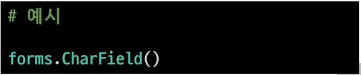

2. Widgets
    - 웹 페이지의 HTML input 요소 렌더링을 담당  
        - 단순히 input 요소의 보여지는 부분을 변경  
    
    Widgets는 반드시 form fields에 할당 됨  

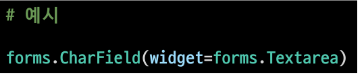

### Widgets

<b>개요</b>  

Django의 HTML input elemenet의 표현을 담당  

단순히 HTML 렌더링을 처리하는 것이 유효성 검증과 아무런 관계가 없음  
- 웹 페이지에서 input element의 단순 raw한 렌더링만을 처리하는 것일 뿐  

다양한 built-in 위젯들

<a href= "https://docs.djangoproject.com/ko/4.1/ref/forms/widgets/">https://docs.djangoproject.com/ko/4.1/ref/forms/widgets/</a>

### Django ModelForm

<b>개요</b>  

Form Class를 작성하면서 든 생각?
- "Model이랑 너무 중복되는 부분이 많은 것 같은데?"

이미 Article Model Class 필드데 대한 정보를 작성했는데 이를 Form에 맵핑하기 위해 Form Class에 필드를 재정의 해야만 했음  

ModelForm을 사용하려면 이러한 Form을 더 쉽게 작성할 수 있음  

&nbsp;

<b>ModelForm Class</b>  

Model을 통해 Form Class를 만들 수 있는 helper class  

ModelForm은 Form과 똑같은 방식을 View함수에서 사용  

&nbsp;

<b>ModelForm 선언</b>

forms 라이브러리에서 파생된 ModelForm 클래스를 상속받음  

정의한 ModelForm 클래스 안에 Meta 클래스를 선언  

어떤 모델을 기반을 form을 작성할 것인지에 대한 정보를 Meta 클래스에 지정  

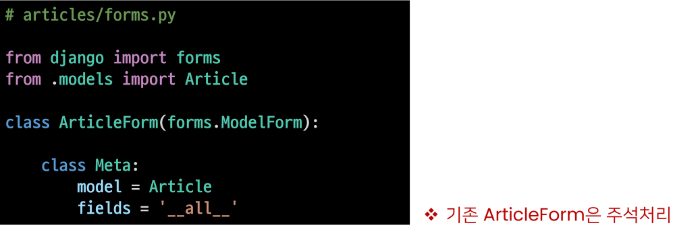

<b>ModelForm에서의 Meta Class</b>  

ModelForm의 정보를 작성하는 곳  

ModelForm을 사용할 경우 참조할 모델이 있어야 하는데, Meta class의 model 속석이 이를 구성함  
- 참조하는 모델에 정의된 field 정보를 Form에 적용함  

field 속성에 '\_\_all\_\_'를 사용하여 모델의 모든 필드를 포함할 수 있음  

또는 eclude 속성을 사용하여 모델에 포함하지 않을 필드를 지정할 수 있음  

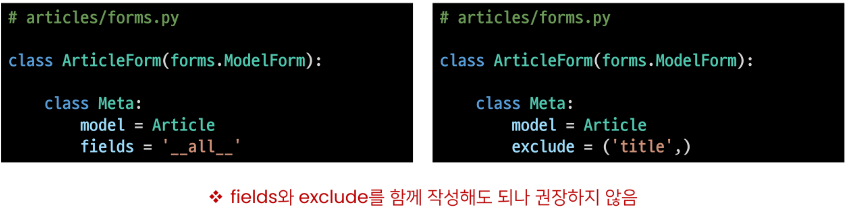

<b>주의사항</b>  

Meta 클래스는 왜 여기에 작성할까?
- 파이썬의 문법적 개념으로 접근하지 말 것  

단순히 모델 정보를 Meta라는 이름의 내부 클래스로 작성하도록 ModelForm의 설계가 이렇게 되어있을 뿐 <br>
우리는 ModelForm의 역할과 사용법을 숙지해야 함  

우리가 상속하고 있는 부모 클래스인 ModelForm이 궁금하다면?
<a href="https://github.com/django/django/blob/main/django/forms/models.py#L332">https://github.com/django/django/blob/main/django/forms/models.py#L332</a>

### Model Form 구현하기  

<b>개요</b>  

ModelForm으로 인한 view 함수의 구조 변화 알아보기  

&nbsp;

<b>CREATE</b>  

유효성 검사를 통과하면 
- 데이터 저장 후 
- 상세 페이지로 리다이렉트  

통과하지 못하면  
- 작성 페이지로 리다이렉트  

```
# articles/views.py

...
def create(request):
    if request.method == 'POST':
        form = ArticleForm(request.POST)
        if form.is_valid():
            article = form.save()
            return redirect('articles:detail', pk=article.pk)
        return redirect('articles:create')
    else:
        form = ArticleForm()
        context = {'form': form,}
        return render(request, 'articles/create.html', context)

```

<b>is_valid method</b>  

유효성 검사를 실행하고, 데이터가 유효한지 여부를 boolean으로 반환  

데이터 유효성 검사를 보장하기 위한 많은 테스트에 대해 Django는 is_valid()를 제공하여 개발자의 편의를 도움  

&nbsp;

<b>save method</b>  

form 인스턴스에 바인딩 된 데이터를 통해 데이터베이스 객체를 만들고 저장  

ModelForm의 하위 클래스는 키워드 인자 instance 여부를 통해 생성할 지, 수정할 지를 결정함  
- 제공되지 않은 경우 save()는 지정된 모델의 새 인스턴스를 만듦(CREATE)  
- 제공되면 save()는 해당 인스턴스를 수정 (UPDATE)

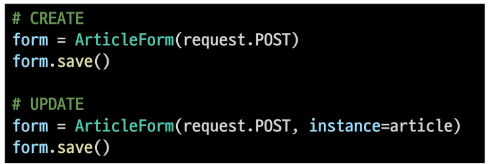

&nbsp;

<b>create 함수 정리하기</b>  

```
# articles/views.py # 어려움  

def create(request):
    if request.method == 'POST':
        form = ArticleForm(request.POST)
        if form.is_valid():
            article = form.save()
            return redirect('articles:detail', pk=article.pk)
    
    else:
        form = ArticleForm()
    
    context = {'form': form,}
    return render(request, 'articles/create.html', context)
```

<b>UPDATE</b>

ModelForm의 인자 instance는 수정 대상이 되는 객체(기존 객체)를 지정  

1. request.POST
- 사용자가 form을 통해 전송한 데이터 (새로운 데이터)

2. instance
- 수정이 되는 대상  


```
# aritcles/views.py

...
def update(request, pk):
    article = Article.objects.get(pk=pk)
    if request.method == 'POST':
        form = ArticleForm(request.POST, instance = article)
        if form.is_valid():
            form.save()
            return redirect('articles:detail', pk=article.pk)

    else:
        form = ArticleForm(instance=article)
        
    context = {'form': form, 'article': article}
    return render(request, 'articles/update.html', context)


# articles/templates/articles/update.html

{% extends 'base.html' %}

{% block content %}
  <h1>글수정</h1>
  <hr>

  <form action="{% url 'articles:update' article.pk %}" method="POST">
    {% csrf_token %}
    {{ form.as_p }}
    <input type="submit">
  </form>

  <hr>
  <a href="{% url 'articles:detail' article.pk %}">돌아가기</a>
{% endblock content %}

```

<b>Form과 ModelForm</b>  

ModelForm이 Form보다 더 좋은 것이 아니라 각자의 역할이 다른 것  

Form
- 사용자의 입력을 필요로 하며 직접 이력 데이터가 DB 저장에 사용되지 않거나 일부 데이터만 사용될 때
- (예시 - 로그인, 사용자의 데이터를 받아 인증 과정에서만 사용 후 별도로 DB에 저장하지 않음)  

ModelForm
- 사용자의 입력을 필요로 하며 입력을 받는 것을 그대로 DB필드에 맞춰 저장할 때  
- 데이터의 유효성 검사가 끝나면 데이터를 각각 어떤 레코드에 맵핑해야 할지 이미 알고 있기 때문에 곧바로 save() 호출이 가능  

### Widget

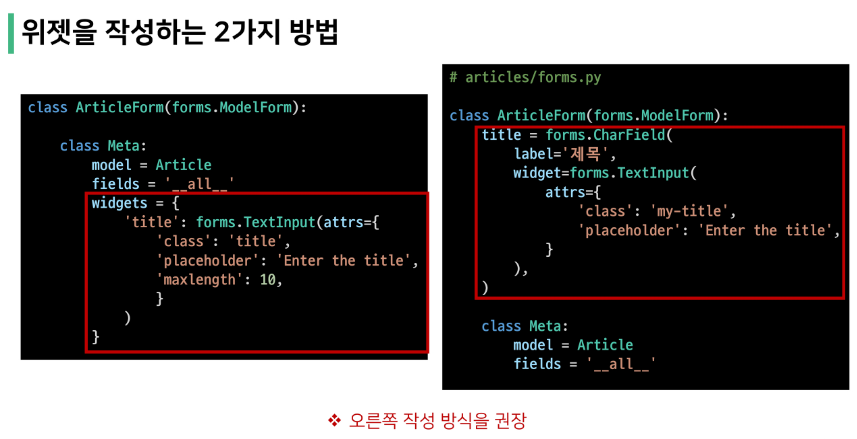

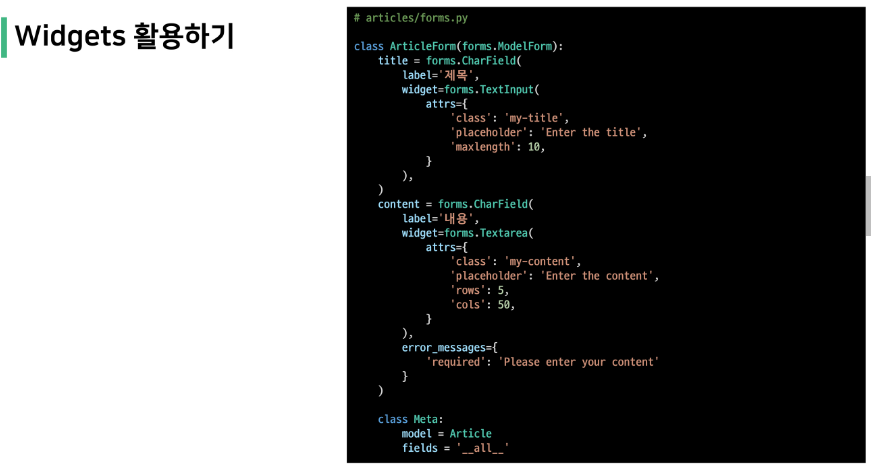

### Static files

<b>Static File(개발자?)</b>

응답할 때 별도의 처리 없이 파일 내용을 그대로 보여주면 되는 파일  
- 사용자의 요청에 따라 내용이 바뀌는 것이 아니라 요청한 것을 그대로 보여주는 것  

<mark>파일 자체가 고정</mark>되어 있고, 서비스 중에도 추가되거나 <mark>변경되지 않고 고정</mark>되어 있음
- 예를 들어, 웹 사이트는 일반적으로 이미지, 자바 스크립트 또는 CSS와 같은 미리 준비된 추가 파일(움직이지 않는)을 제공해야 함  

Django에서는 이렇나 파일을 "static file"이라고 함  
- Django는 <em>staticfiles</em> 앱을 통해 정적 파일과 관련된 기능을 제공  


<b>Media File(유저?)</b>  

미디어 파일  

사용자가 웹에서 업로드하는 정적 파일(user-uploaded)  

유저가 업로드한 모든 정적 파일  

&nbsp;

<b>웹 서버와 정적 파일</b>  

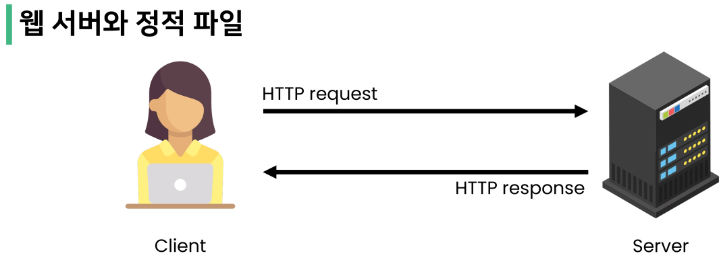

웹 서버의 기본 동작은 
- 특정 위치(URL)에 있는 자원을 요청(HTTP request) 받아서  
- 응답(HTTP response)을 처리하고 제공(serving)하는 것  

&nbsp;

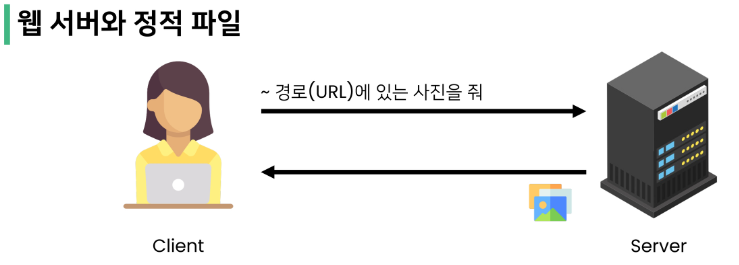

이는 "자원과 자원에 접근 가능한 주소가 있다."라는 의미  
- 예를 들어 사진 파일은 자원이고 해당 <mark>사진 파일을 얻기 위한 경로인 웹 주소(URL)가 존재</mark>함  
- 즉, 웹 서버는 요청 받은 URL로 서버에 존재하는 정적 자원(static resource)을 제공함  

### Static files  구성하기   

<b>Django에서 정적파일을 구성하고 사용하기 위한 몇 가지 단계</b>  

1. INSTALLED_APPS에 django.contrib.staticfiles가 포함되어 있는지 확인하기  
2. settings.py에서 <mark>STATIC_URL</mark>을 정의하기  
3. 앱의 static 폴더에 정적 파일을 위치하기
- 예시) my_all/static/sample_img.jpg
4. 템플릿에서 static 템플릿 태그를 사용하여 지정된 경로에 있는 정적 파일의 URL 만들기

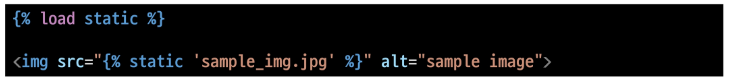

<b>Django template tag</b>  
```
{% load %}  
```
load tag  
특정 라이브러리, 패키지에 등록된 모든 템플릿 태그와 필터를 로드  

```
{% static '' %}  
```
static tag  
STATIC_ROOT에 저장된 정적 파일에 연결  


<b>Static files 관련 Settings</b>  

1. STATIC_ROOT (배포 시 파일을 한 곳에 모을 때 사용)
2. STATICFILES_DIRS (다른 곳에 static파일을 두고 싶을 때 사용)
3. STATIC_URL(중요!: url에 대해 사용할 경로를 지정)

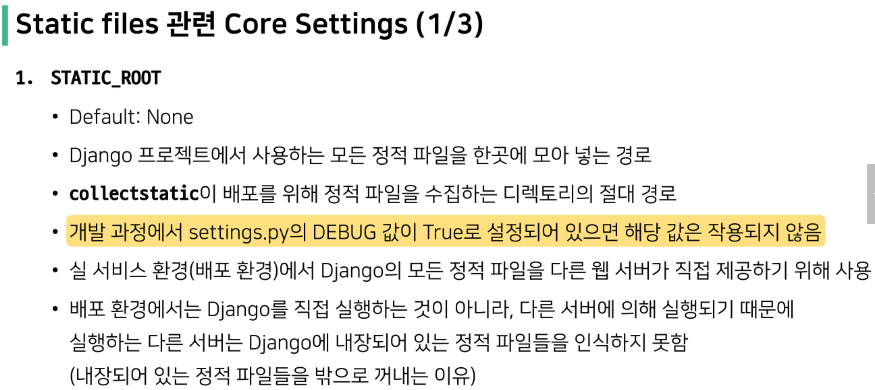

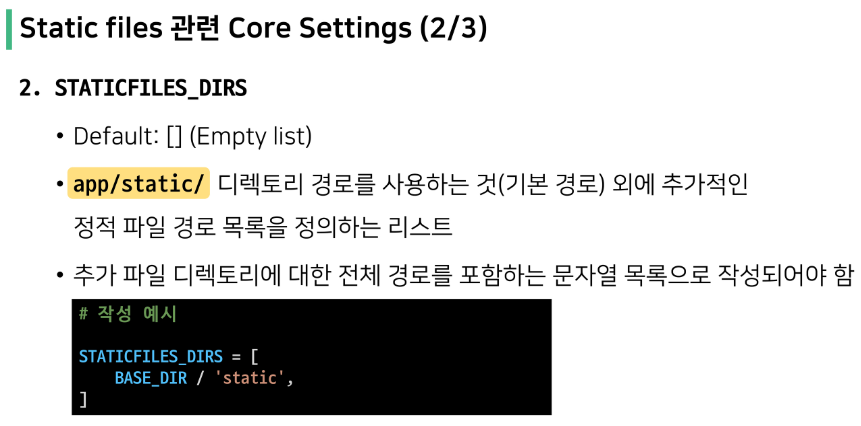

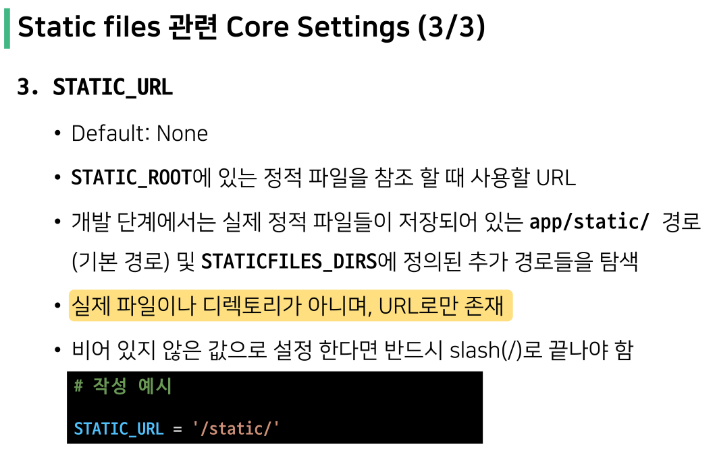

### Static files 사용하기  

<b>static file 가져오기</b>

static file을 가져오는 2가지 방법  

1. 기본 경로에 있는 static file 가져오기  
2. 추가 경로에 있는 static file 가져오기  


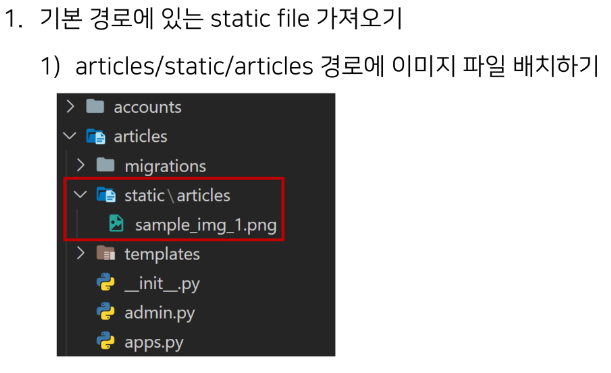


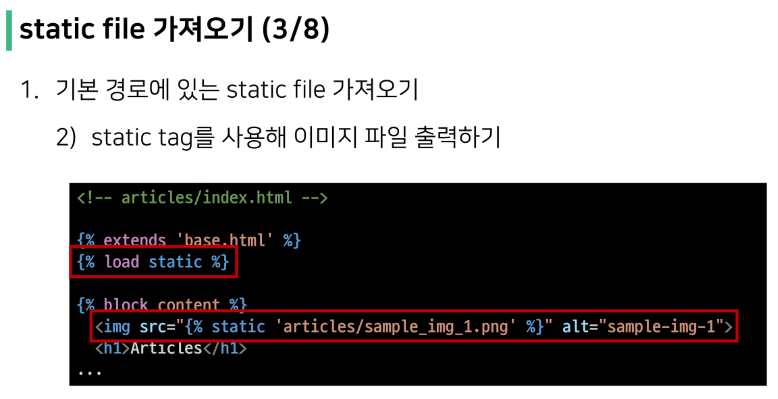


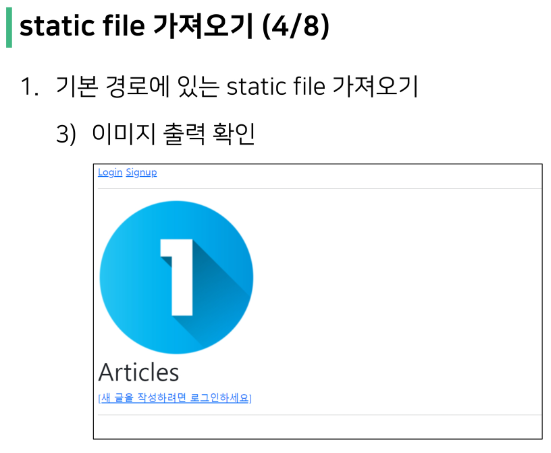


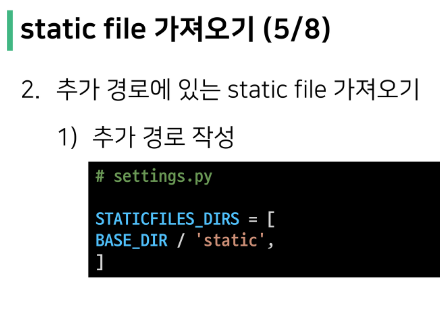


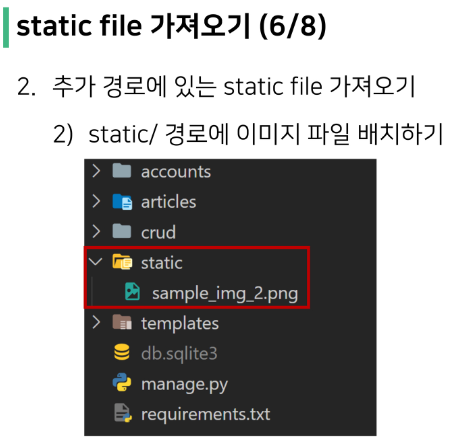


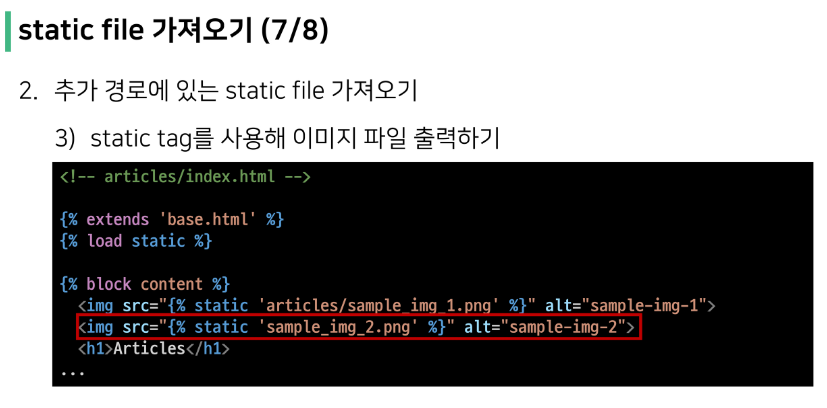


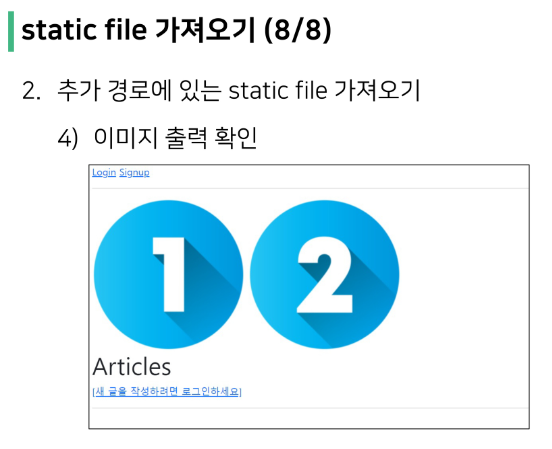

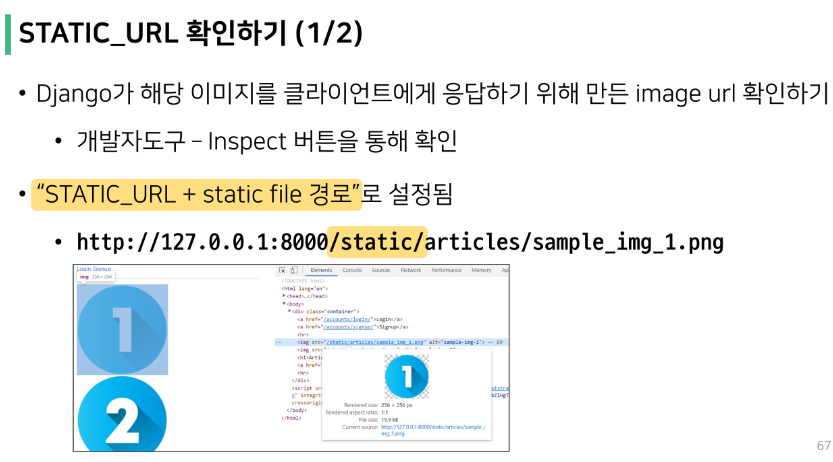

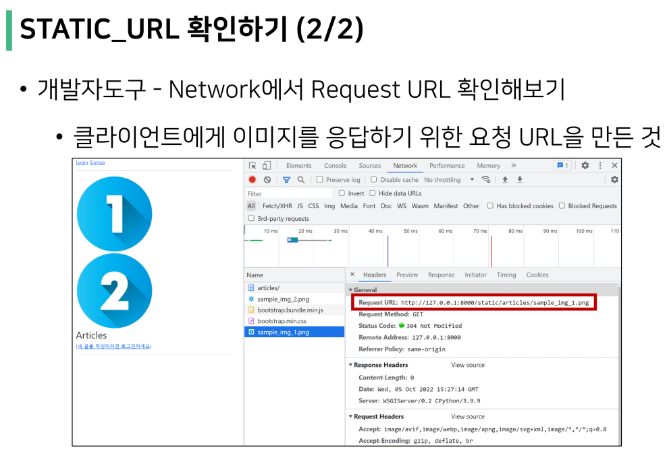

### Media Files

<b>imageField()</b>  

이미지 업로드에 사용하는 모델 필드  

FileField를 상속받는 서브 클래스이기 대문에 FileField의 모든 속성 및 메서드를 사용 가능  

더해서 사용자에 의해 업로드 된 객체가 유효한 이미지인지 검사  

ImageField 인스턴슨느 최대 길이가 100자인 문자열로 DB에 생성되며, max_length 인자를 사용하여 최대 길이를 변경할 수 있음  

&nbsp;

<b>FileField()</b>

```FileField(upload_to='', storage=None, max_length=100, **options)```  

파일 업로드에 사용하는 모델 필드  

2개의 선택 인자를 가지고 있음  
1. upload_to
2. <del>stotrage</del>

&nbsp;

<b>FileField / ImageField를 사용하기 위한 단계</b>  

1. settings.py에 <mark>MDIA_ROOT, MEDIA_URL</mark> 설정  
2. <mark>upload_to</mark> 속성을 정의하여 업로드 된 파일에 사용할 MEDIA_ROOT의 하위 경로를 지정(선택사항)  

&nbsp;

<b>MEDIA_ROOT</b>  

Default: '' (Empot string)  

사용자가 업로드한 파일(미디어 파일)들을 보관할 디렉토리의 절대 경로  

Django는 성을 위해 업로드 파일은 데이터베이스에 저장하지 않음  
- 데이터베이스에 저장되는 것은 <mark>파일 경로</mark>   

MEDIA_ROOT는 STATIC_ROOT와 바드시 다른 경로로 지정해야 함  

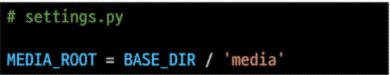

<b>개발 단계에서 사용자가 업로드한 미디어 파일 제공하기</b>  

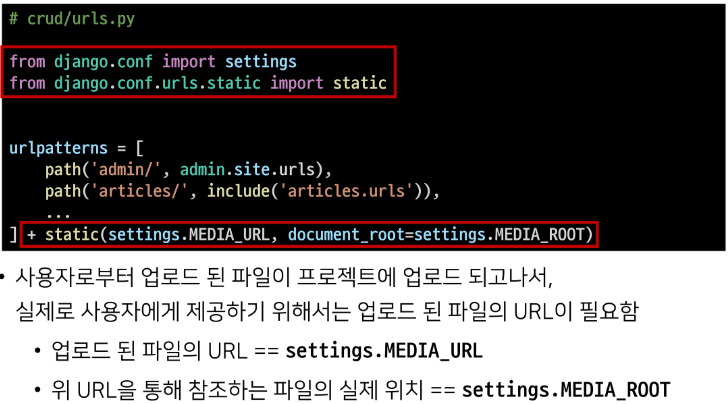

### MEDIA FILE 사용하기  
### CREATE

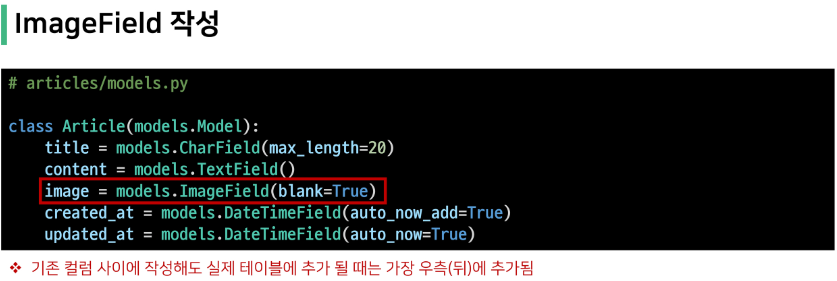

&nbsp;

<b>Model field option</b>  

Model field option 중 아래 2가지 사항 알아보기

1. blank
2. null

&nbsp;

<b>blank</b>  

Default: False  

True인 경우 필드를 비워 둘 수 있음  
- 이럴 경우 DB에는 ''(빈 문자열)이 저장됨  

유효성 검사에서 사용됨(is_valid)  
- "Validation-related"  
- 필드에 blank=True가 있으며 form 유효성 검사에서 빈 값을 입력할 수 있음   
<a href="https://docs.djangoproject.com/en/4.1/ref/models/fields/#blank">https://docs.djangoproject.com/en/4.1/ref/models/fields/#blank</a>

<b>null</b>  

Default: False  

True인 경우 Django는 빈 값을 DB에 NULL로 저장함  
- "Database-related"  

&nbsp;

<b>null 관련 주의사항</b>  

<mark>"CharField, TextField와 같은 문자열 기반 필드에는 null옵션 사용을 피해야 함"</mark>  

- 문자열 기반 필드에 null=True로 설정 시 데이터 없음에 대한 표현에 "빈 문자열"과 "NULL" 2가지 모두 가능하게 됨  
- "데이터 없음"에 대한 표현에 두 개의 가능한 값을 갖는 것은 좋지 않음  
- Django는 문자열 기반 필드에서 NULL이 아닌 빈 문자열을 사용하는 것이 규칙  

<b>Mgrations</b>  

ImageField를 사용하려면 반드시 Pillow 라이브러리가 필요  
- Pillow 설치 없이는 makemigrations 실행 불가

```
$ pip install pillow

$ python manage.py makemigrations
$ python manage.py migrate

$ pip freeze > requirements.txt
```

<b>[참고] pillow</b>  

광범위한 파일 형식 지원, 효율적이고 강력한 이미지 처리 기능을 제공하는 라이브러리  

이미지 처리 도구를 위한 견고한 기반을 제공  

&nbsp;

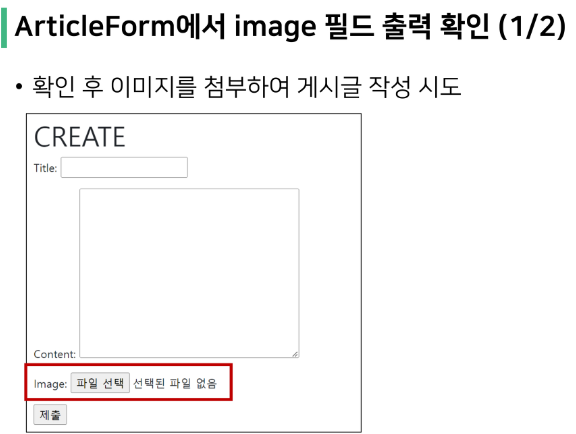

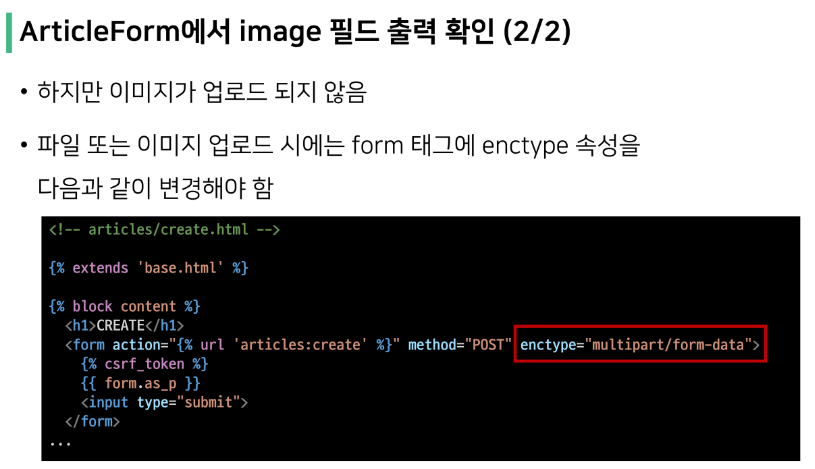

<b>request.FILES</b>  

파일 및 이미지는 request의 POST 속성 값으로 넘어가지 않고 FIlES 속성 값에 담겨 넘어감  

```
# articles.views.py

def create(request):
    if request.method == "POST":
        form = ArticleForm(request.POST, request.FILES)

```

&nbsp;

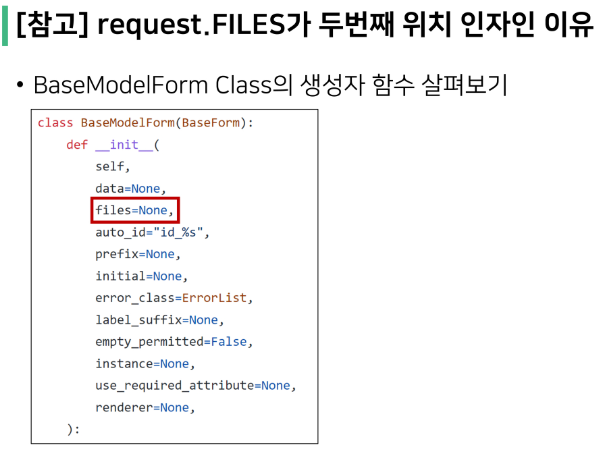

<b>이미지 첨부하기</b>  

만약 같은 이름의 파일을 업로드한다면 Django는 파일 이름 끝에 임의의 난수 값을 붙여 저장함  

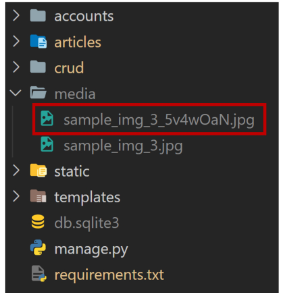

### READ

업로드 이미지 출력하기  

업로드된 파일으 상대 URL은 Django가 제공하는 url 속성을 통해 얻을 수 있음  

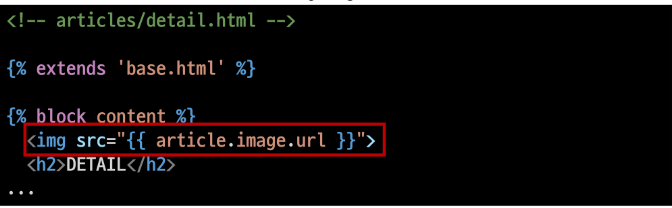  

article.image.url - 업로드 파일의 경로  

article.image - 업로드 파일의 파일 이름  

<b>업로드 이미지 출력하기</b>  

이미지를 업로드하지 않은 게시물은 detail template를 출력할 수 없는 문제 해결하기  
- 이미지 데이터가 있는 경우만 이미지 출력할 수 있도록 처리  

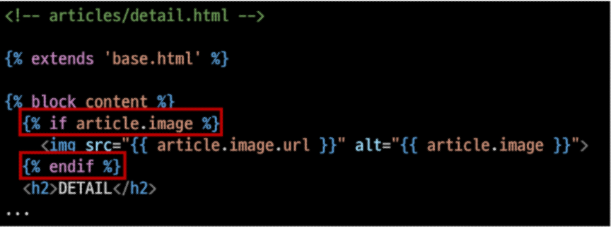

### UPDATE

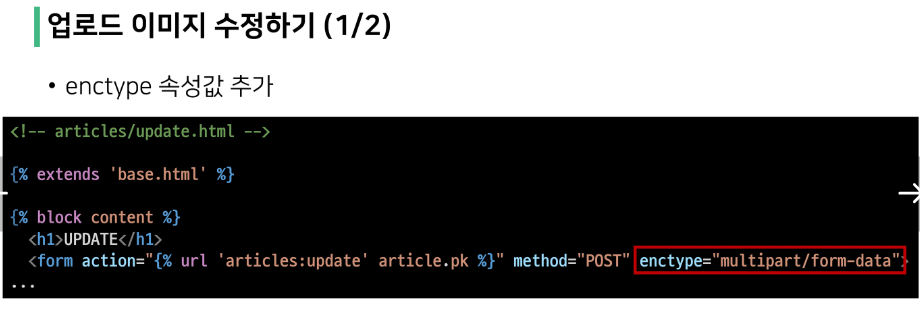

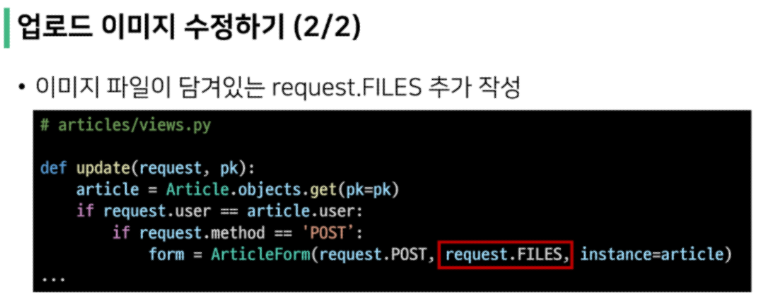